## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.models import load_model

In [2]:
path = '/content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/'

In [3]:
data = pd.read_csv(path+'AALI.JK.csv')
print(data.shape)
data.head()

(250, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-08-12,10550.0,10725.0,10450.0,10625.0,10564.108398,1685100
1,2019-08-13,10625.0,11175.0,10350.0,11075.0,11011.529297,5485700
2,2019-08-14,11200.0,11250.0,10800.0,11175.0,11110.956055,2188800
3,2019-08-15,11000.0,11100.0,10800.0,11075.0,11011.529297,2610500
4,2019-08-16,11075.0,11075.0,10500.0,10950.0,10887.246094,2283900


In [4]:
time = []
for i in range(0, data.shape[0]):
  time.append(i)

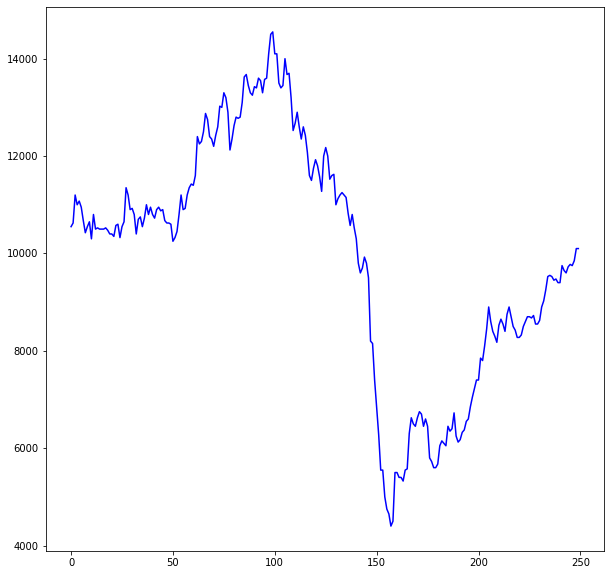

In [5]:
plt.figure(figsize=(10,10))
plt.plot(time, data['Open'], 'blue')

In [6]:
data_train = data.iloc[:200,:]
data_test = data.iloc[200:,:]

print(data_train.shape)
print(data_test.shape)

(200, 7)
(50, 7)


In [7]:
data_train.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
195,2020-05-26,6600.0,6825.0,6550.0,6825.0,6785.886230,2588600
196,2020-05-27,6850.0,7000.0,6775.0,6975.0,6935.026367,3214700
197,2020-05-28,7050.0,7425.0,7000.0,7225.0,7183.593750,3579300
198,2020-05-29,7225.0,7400.0,7100.0,7400.0,7357.590820,11900200
199,2020-06-02,7400.0,7625.0,7300.0,7350.0,7307.877441,2695200


In [8]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
200,2020-06-03,7400.0,7725.0,7350.0,7700.0,7655.871582,3576400
201,2020-06-04,7850.0,8000.0,7700.0,7875.0,7829.868652,2815100
202,2020-06-05,7800.0,7925.0,7700.0,7850.0,7805.011719,1053100
203,2020-06-08,8100.0,8500.0,7950.0,8375.0,8327.002930,2582700
204,2020-06-09,8450.0,8900.0,8375.0,8900.0,8848.994141,3280500


In [9]:
training_set = data_train.iloc[:, 1:2].values
test_set = data_test.iloc[:, 1:2].values

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
test_set_scaled = sc.transform(test_set)

## Using 3 Timestamp

In [11]:
# PROSES TRAINING

In [12]:
X_train = []
y_train = []
for i in range(3, 200):
    X_train.append(training_set_scaled[i-3:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(3, 50):
    X_test.append(test_set_scaled[i-3:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [13]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [14]:
from keras.callbacks import ModelCheckpoint
filepath= path+"AALI_3lag.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [15]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 8, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

Epoch 1/100
24/25 [===========================>..] - ETA: 0s - loss: 0.2375
Epoch 1: val_loss improved from inf to 0.03582, saving model to /content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/AALI_3lag.h5
25/25 [==============================] - 21s 193ms/step - loss: 0.2353 - val_loss: 0.0358
Epoch 2/100
23/25 [==========================>...] - ETA: 0s - loss: 0.0473
Epoch 2: val_loss improved from 0.03582 to 0.01313, saving model to /content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/AALI_3lag.h5
25/25 [==============================] - 1s 30ms/step - loss: 0.0472 - val_loss: 0.0131
Epoch 3/100
24/25 [===========================>..] - ETA: 0s - loss: 0.0277
Epoch 3: val_loss improved from 0.01313 to 0.00403, saving model to /content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/AALI_3lag.h5
25/25 [==============================] - 1s 28ms/step - loss: 0.0273 - val_loss: 0.0040
Epoch 4/100
22/25 [===========

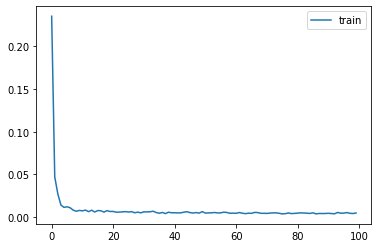

In [16]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [17]:
# PROSES TESTING
regressor = load_model(filepath)

In [18]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [19]:
match_test = data_test.iloc[3:,1:2]
print(match_test.shape)
match_test['Predict'] = predicted_stock_price
match_test.head()

(47, 1)


,Open,Predict
203,8100.0,7662.401855
204,8450.0,7954.250488
205,8900.0,8024.642578
206,8600.0,8344.066406
207,8400.0,8675.928711


In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mae = mean_absolute_error(match_test['Open'], match_test['Predict'])
rmse = sqrt(mean_squared_error(match_test['Open'], match_test['Predict']))
print('RMSE : ', rmse)
print('MAE : ', mae)

RMSE :  292.00586949440077
MAE :  235.89982962101064


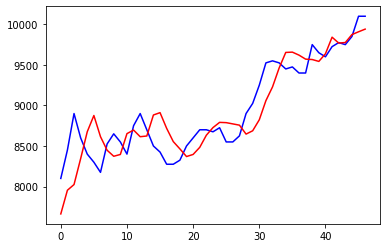

In [21]:
t = []
for i in range(0, match_test.shape[0]):
  t.append(i)

plt.plot(t,match_test['Open'], 'blue')
plt.plot(t,match_test['Predict'], 'red')

## Using 2 Timestamp

In [22]:
# PROSES TRAINING

In [23]:
X_train = []
y_train = []
for i in range(2, 200):
    X_train.append(training_set_scaled[i-2:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = []
y_test = []
for i in range(2, 50):
    X_test.append(test_set_scaled[i-2:i, 0])
    y_test.append(test_set_scaled[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [24]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [25]:
from keras.callbacks import ModelCheckpoint
filepath= path+"AALI_2lag.h5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [26]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
history = regressor.fit(X_train, y_train, epochs = 100, batch_size = 8, validation_data=(X_test, y_test), verbose=1, callbacks=[checkpoint])

Epoch 1/100
25/25 [==============================] - ETA: 0s - loss: 0.2925
Epoch 1: val_loss improved from inf to 0.01967, saving model to /content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/AALI_2lag.h5
25/25 [==============================] - 10s 109ms/step - loss: 0.2925 - val_loss: 0.0197
Epoch 2/100
25/25 [==============================] - ETA: 0s - loss: 0.0555
Epoch 2: val_loss improved from 0.01967 to 0.00997, saving model to /content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/AALI_2lag.h5
25/25 [==============================] - 0s 13ms/step - loss: 0.0555 - val_loss: 0.0100
Epoch 3/100
24/25 [===========================>..] - ETA: 0s - loss: 0.0375
Epoch 3: val_loss improved from 0.00997 to 0.00679, saving model to /content/drive/MyDrive/MSIB/13. Case Study Industri (Forecasting Finance Data)/AALI_2lag.h5
25/25 [==============================] - 0s 15ms/step - loss: 0.0368 - val_loss: 0.0068
Epoch 4/100
23/25 [===========

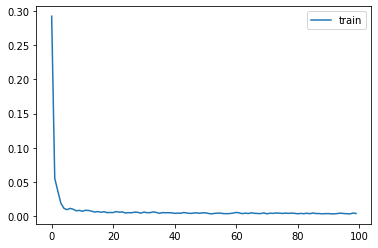

In [27]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.show()

In [28]:
# PROSES TESTING
regressor = load_model(filepath)

In [29]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [30]:
match_test = data_test.iloc[2:,1:2]
print(match_test.shape)
match_test['Predict'] = predicted_stock_price
match_test.head(48)

(48, 1)


,Open,Predict
202,7800.0,7695.692383
203,8100.0,7998.503418
204,8450.0,8013.401367
205,8900.0,8288.349609
206,8600.0,8628.642578
207,8400.0,8917.971680
208,8300.0,8650.680664
209,8175.0,8482.610352
210,8525.0,8386.499023
211,8650.0,8356.345703


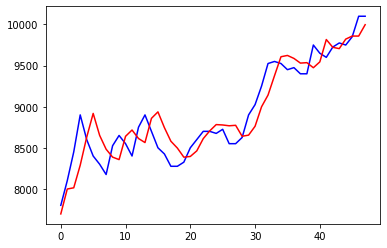

In [31]:
t = []
for i in range(0, match_test.shape[0]):
  t.append(i)

plt.plot(t,match_test['Open'], 'blue')
plt.plot(t,match_test['Predict'], 'red')

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

mae = mean_absolute_error(match_test['Open'], match_test['Predict'])
rmse = sqrt(mean_squared_error(match_test['Open'], match_test['Predict']))
print('RMSE : ', rmse)
print('MAE : ', mae)

RMSE :  237.17026011773157
MAE :  193.16252644856772
